In [1]:
#Import Required Libraries 

import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
import missingno as msno
import zipcodes as zc
import plotly as py
import plotly.graph_objs as go
import math

In [5]:
# Set the session options
%matplotlib inline
pd.options.display.max_columns = None
#pd.options.display.max_rows = None
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:,.2f}'.format

In [6]:
# Read file and let Python detect the variable types at the cost of memory, rather than guessing the dtypes.
loan=pd.read_csv(r'loan.csv',low_memory=False)

# Data Cleaning 

This section covers the Data Cleaning actions. The following is the high level Data cleaning approach -

* Remove all the columns that have no data.
* Remove all the rows that have no data.
* Remove all the columns that have single unique value.
* Remove all the columns that have NaNs in atleast 1/3rd of the total rows.
* Investigate each column and cleanse the data or delete as appropriate.

In [7]:
# Get some idea on the data size and sample data 
print(loan.shape)
loan.head(2)

(39717, 111)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,"4,975.00",36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,"24,000.00",Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,"5,863.16","5,833.84","5,000.00",863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,"2,500.00",60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,"30,000.00",Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,"1,008.71","1,008.71",456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN


In [38]:
# Drop columns and Rows that don't have Data or.
loan_data=loan.dropna(axis=1,how='all')
loan_data=loan_data.dropna(axis=0,how='all')

#Drop columns that have same values in complete column
loan_column_nonunique = loan_data.nunique().sort_values()
unique_cols = loan_column_nonunique[loan_column_nonunique==1].index
loan_data.drop(columns=unique_cols,axis=1,inplace=True)

#Ignore columns that have atleast one-third of Nil values, 
#we get 3 columns which are having > 1/3 nill values, we are ignoring and saving in actual dataframe
loan_data = loan_data.loc[:, (loan_data.isnull().sum(axis=0) <= len(loan_data)/3)]

#Now get the final size and remaining columns
print(loan_data.shape)

(39717, 45)


In [47]:

# Check the distribution of NaN across the columns
loan_data[loan_data.columns[loan_data.isnull().any()]].head(2)

,emp_title,emp_length,desc,title,revol_util,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,NaN,10+ years,Borrower added on 12/22/11 > I need to upgra...,Computer,83.70%,Jan-15,May-16,0.00
1,Ryder,< 1 year,Borrower added on 12/22/11 > I plan to use t...,bike,9.40%,Apr-13,Sep-13,0.00


<AxesSubplot:>

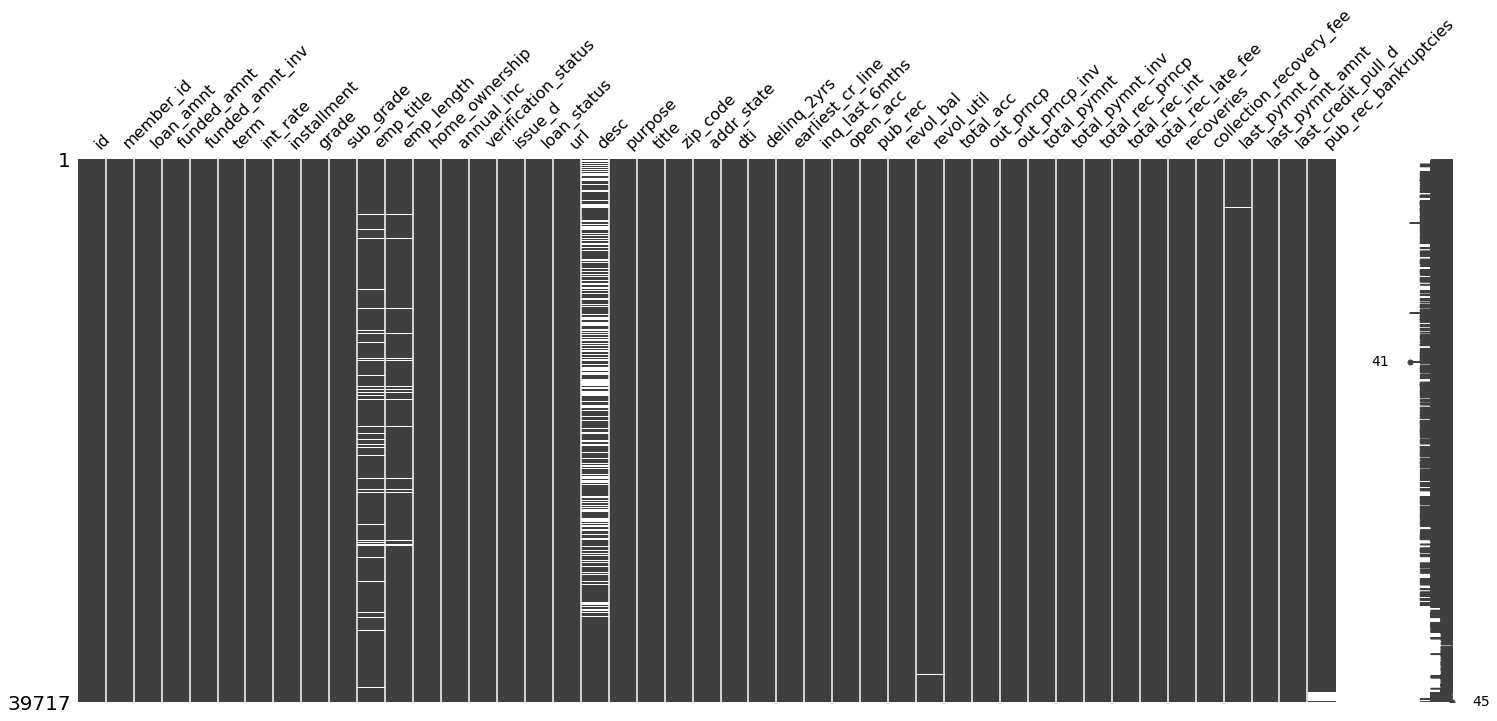

In [48]:
msno.matrix(loan_data)

Now clean and treat each variable in the data set

In [50]:
loan_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies
count,"39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,717.00","39,020.00"
mean,"683,131.91","850,463.56","11,219.44","10,947.71","10,397.45",324.56,"68,968.93",13.32,0.15,0.87,9.29,0.06,"13,382.53",22.09,51.23,50.99,"12,153.60","11,567.15","9,793.35","2,263.66",1.36,95.22,12.41,"2,678.83",0.04
std,"210,694.13","265,678.31","7,456.67","7,187.24","7,128.45",208.87,"63,793.77",6.68,0.49,1.07,4.40,0.24,"15,885.02",11.40,375.17,373.82,"9,042.04","8,942.67","7,065.52","2,608.11",7.29,688.74,148.67,"4,447.14",0.20
min,"54,734.00","70,699.00",500.00,500.00,0.00,15.69,"4,000.00",0.00,0.00,0.00,2.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"516,221.00","666,780.00","5,500.00","5,400.00","5,000.00",167.02,"40,404.00",8.17,0.00,0.00,6.00,0.00,"3,703.00",13.00,0.00,0.00,"5,576.93","5,112.31","4,600.00",662.18,0.00,0.00,0.00,218.68,0.00
50%,"665,665.00","850,812.00","10,000.00","9,600.00","8,975.00",280.22,"59,000.00",13.40,0.00,1.00,9.00,0.00,"8,850.00",20.00,0.00,0.00,"9,899.64","9,287.15","8,000.00","1,348.91",0.00,0.00,0.00,546.14,0.00
75%,"837,755.00","1,047,339.00","15,000.00","15,000.00","14,400.00",430.78,"82,300.00",18.60,0.00,1.00,12.00,0.00,"17,058.00",29.00,0.00,0.00,"16,534.43","15,798.81","13,653.26","2,833.40",0.00,0.00,0.00,"3,293.16",0.00
max,"1,077,501.00","1,314,167.00","35,000.00","35,000.00","35,000.00","1,305.19","6,000,000.00",29.99,11.00,8.00,44.00,4.00,"149,588.00",90.00,"6,311.47","6,307.37","58,563.68","58,563.68","35,000.02","23,563.68",180.20,"29,623.35","7,002.19","36,115.20",2.00


In [51]:
# To check if disbursed amount is greater then loan amount requested
loan_data[loan_data['funded_amnt'] > loan_data['loan_amnt']]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies


In [112]:
# Loan Status - Convert loan_status to lower, remove any spaces and find unique values.
print('--- Loan Status ----\n')
loan_data['loan_status']=loan_data['loan_status'].str.strip().str.lower()
print(loan_data.loan_status.nunique())
print(loan_data.loan_status.unique())

# Term - Check 'term' and remove the extra charecters 'Months'. Identify the unique values.
print('--- Term ----\n')
loan_data['term']=loan_data['term'].str.replace(' months','')
print(loan_data['term'].nunique())
print(loan_data['term'].unique())

# To check unique values count in column --> loan_data['loan_status'].value_counts()
group_loan_status = loan_data.groupby(['loan_status'], as_index=False).size().reset_index()
group_loan_status.reset_index(drop=True)
group_loan_status.reset_index()
print(group_loan_status)


# Employement Length - Replace the extraneous charecters in the employee length and impute the NaNs as 'Not Disclosed'
print('--- Employee Length ----\n')
loan_data['emp_length']=loan_data['emp_length'].str.strip().str.replace(' years','').str.replace('+','').str.replace('< 1','0').str.replace(' year','')
loan_data.emp_length.fillna(value='Not Disclosed',inplace=True)
print(loan_data.emp_length.unique())
print(loan_data.emp_length.describe())

# Investigate Annual income
print('--- Annual Income ----\n')
print(loan_data.annual_inc.median())

# Create a new derived column - log to the base 2 for annual income for analysis purpose. Which is the 2 power x
loan_data['annual_inc_log2']=np.log2(loan_data['annual_inc'])
loan_data['annual_inc_log2']

# Issue Date - convert issue date to date time format
print('--- Issue Date ----\n')
loan_data['issue_date_dt']=pd.to_datetime(loan_data['issue_d'],format='%b-%y')
print(loan_data.issue_date_dt.describe())

# Dti - Identify the unique values
print('--- DTI ----\n')
print(loan_data.dti.nunique())


#delinq_2yrs - Number of 30+ months passed after delinquecy incidents in last 2 years.
print('--- delinq_2yrs ----\n')
print(loan_data.delinq_2yrs.nunique())
print(loan_data.delinq_2yrs.unique())
print(loan_data.groupby(by='delinq_2yrs')['id'].count())


#inq_last_6mth - Just check values
print('--- inq_last_6mth ----\n')
print(loan_data.inq_last_6mths.nunique())
print(loan_data.inq_last_6mths.unique())

#int_rate - apply the string cleaning and validate the nunique values
print('--- interest rate ----\n')
loan_data['int_rate_f']=loan_data['int_rate'].str.replace('%','').astype(float)
print(loan_data.int_rate_f.nunique())

#installemnt - Just check 
print('--- installment ----\n')
print(loan_data.installment.nunique())
print(loan_data.installment.describe())
print(loan_data.installment.median())

# pub_rec - Check the values
print('--- pub_rec ----\n')
print(loan_data.pub_rec.nunique())
print(loan_data.pub_rec.unique())

--- Loan Status ----

3
['fully paid' 'charged off' 'current']
--- Term ----

2
[' 36' ' 60']
   index  loan_status   size
0      0  charged off   5627
1      1      current   1140
2      2   fully paid  32950
--- Employee Length ----

['10' '0' '1' '3' '8' '9' '4' '5' '6' '2' '7' 'Not Disclosed']
count     39717
unique       12
top          10
freq       8879
Name: emp_length, dtype: object
--- Annual Income ----

59000.0
--- Issue Date ----

count                   39717
unique                     55
top       2011-12-01 00:00:00
freq                     2260
first     2007-06-01 00:00:00
last      2011-12-01 00:00:00
Name: issue_date_dt, dtype: object
--- DTI ----

2868
--- delinq_2yrs ----

11
[ 0  2  3  1  4  6  5  8  7  9 11]
delinq_2yrs
0     35405
1      3303
2       687
3       220
4        62
5        22
6        10
7         4
8         2
9         1
11        1
Name: id, dtype: int64
--- inq_last_6mth ----

9
[1 5 2 0 3 4 6 7 8]
--- interest rate ----

371
--- installment -

In [111]:
# pub_rec - Check the values
print('--- pub_rec ----\n')
print(loan_data.pub_rec.nunique())
print(loan_data.pub_rec.unique())

--- pub_rec ----

5
[0 1 2 3 4]
